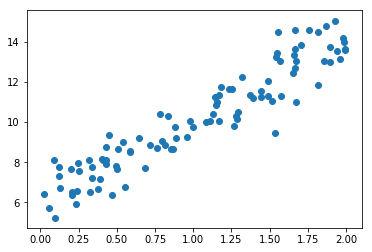

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# y = w0 + w1 * x 단순 선형 회귀 식 
# y = 4x + 6(w0 = 6, w1= 4)에 대한 선형 근사를 위해 값 준비
x = 2 * np.random.rand(100, 1) # 0 ~ 2까지 100개 임의의 점
y = 6 + 4 * x + np.random.randn(100, 1) # 4x + 6 + 정규 분포를 따르는 노이즈

plt.scatter(x, y)

In [3]:
def get_weight_update(w1, w0, x, y, learning_rate=0.01):
    # y는 길이가 100인 벡터, 길이 가져옴
    N = len(y)
    
    # 계수 w0, w1 갱신 값을 계수 w0, w1 동일한 형태로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 주어진 선형 회귀 식을 통한 값 추정
    y_pred = np.dot(x, w1.T) + w0
    # 잔차 y - hat_y
    diff = y - y_pred
    
    # (100, 1) 형태의 [[1, 1, ..., 1]] 행렬 생성, diff와 내적을 구하기 위함.
    w0_factors = np.ones((N, 1))
    
    # 우측의 식은 MSE를 w1과 w0에 대해 편미분을 하여 구함.
    # d mse/d w0 = 0 이 되게하는 w0이 mse의 최소로 함
    # d mse/d w1 = 0 이 되게하는 w1이 mse를 최소로 함
    # 급격한 w0, w1 변화를 방지 하기 위해 학습률 learning_rate 사용
    
    w1_update = -(2/N) * learning_rate * (np.dot(x.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [10]:
def gradient_descent_steps(X, y, iters= 10000):
    
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    for idx in range(0, iters):

        w1_update, w0_update = get_weight_update(w1, w0, X, y, learning_rate=0.01)
        # 갱신 값으로 기존의 w1, w0을 조정해 나감
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y- y_pred))/N
    return cost


In [12]:
w1, w0 = gradient_descent_steps(x, y, iters=1000)
print("w1:{0:.4f}, w0:{0:.4f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * x + w0
print("gradient descent total cost : {0:.4f}".format(get_cost(y, y_pred)))

w1:4.0467, w0:4.0467
gradient descent total cost : 0.7567


In [17]:
def stochastic_gradient_descent_steps(x, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 1000000
    iter_idx = 0
    
    for idx in range(iters):
        # x의 크기만큼 임의의 인덱스 추출
        stochastic_random_idx = np.random.permutation(x.shape[0])
        # 임의의 인덱스의 x, y를 배치 사이즈만큼 샘플링
        sample_x = x[stochastic_random_idx[0:batch_size]]
        sample_y = y[stochastic_random_idx[0:batch_size]]
        
        w1_update, w0_update = get_weight_update(w1, w0, sample_x, sample_y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

w1, w0 = stochastic_gradient_descent_steps(x, y, iters=1000)
print("w1:{0:.4f}, w0:{0:.4f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * x + w0
print("gradient descent total cost : {0:.4f}".format(get_cost(y, y_pred)))

w1:4.0670, w0:4.0670
gradient descent total cost : 0.7582
